In [1]:
# 7.1 COMANDOS BÁSICOS DA BIBLIOTECA TIME
import time as tm
tempo = tm.localtime()
print(tempo)

time.struct_time(tm_year=2023, tm_mon=4, tm_mday=7, tm_hour=23, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=97, tm_isdst=0)


In [2]:
import time as tm
tempo = tm.asctime()
print(tempo)

Fri Apr  7 23:00:46 2023


In [4]:
import calendar as cal

calen = cal.month(2023,6)

print(calen)

     June 2023
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30



In [5]:
# 7.2 CÁLCULO DO TEMPO DE PROCESSAMENTO
import time as tm

for i in range(10):
    tempo = tm.localtime()
    print(tempo[4])

3
3
3
3
3
3
3
3
3
3


In [9]:
import time as tm

for i in range(10):
    tempo=tm.localtime()
    print(tempo[4])
    tm.sleep(2)

5
5
5
5
5
5
5
5
5
5


In [11]:
import time as tm

t0 = tm.perf_counter()

for i in range(10):
    tempo = tm.localtime()
    print(tempo[4])
    
t1 = tm.perf_counter()

print(t1 - t0, " segundos de processamento.")

34
34
34
34
34
34
34
34
34
34
0.0049882029998116195  segundos de processamento.


In [13]:
import timeit as tmi

code = """
a = range(10000)
b=[]

for i in a:
    b.append(1*2)
"""

tempo = tmi.timeit(code, number = 100)/100
print(tempo)

0.003218776580033591


In [17]:
import time as tm

inicio = tm.time()

for j in range(100):
    a=range(10000)
    b=[]
    for i in a:
        b.append(1*2)

fim = tm.time()
print("%10.6f segundos de processamento." % (fim-inicio))

  0.427077 segundos de processamento.


### 7.3 FORMATO DE DATAS NOS GRÁFICOS

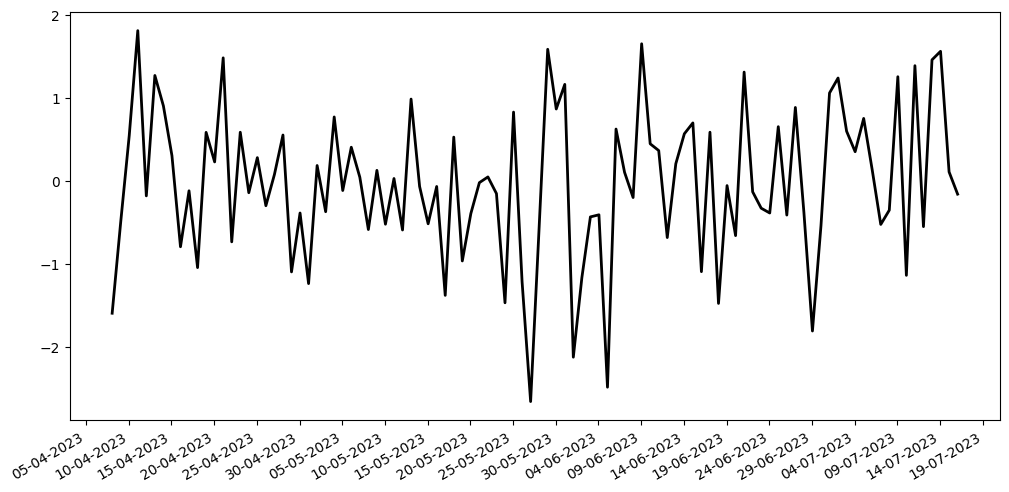

In [29]:
# EXEMPLO 7.1
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as pdt
import numpy as np

n = 100
y = np.random.normal(0,1,n)
hj = dt.datetime.now()
x = hj + dt.timedelta(days=n)
dias = pdt.drange(hj,x,dt.timedelta(days=1))

plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(pdt.DateFormatter('%d-%m-%Y'))

plt.gca().xaxis.set_major_locator(pdt.DayLocator(interval=5))
plt.plot(dias,y,'-k',linewidth=2)
plt.gcf().autofmt_xdate()
plt.show()

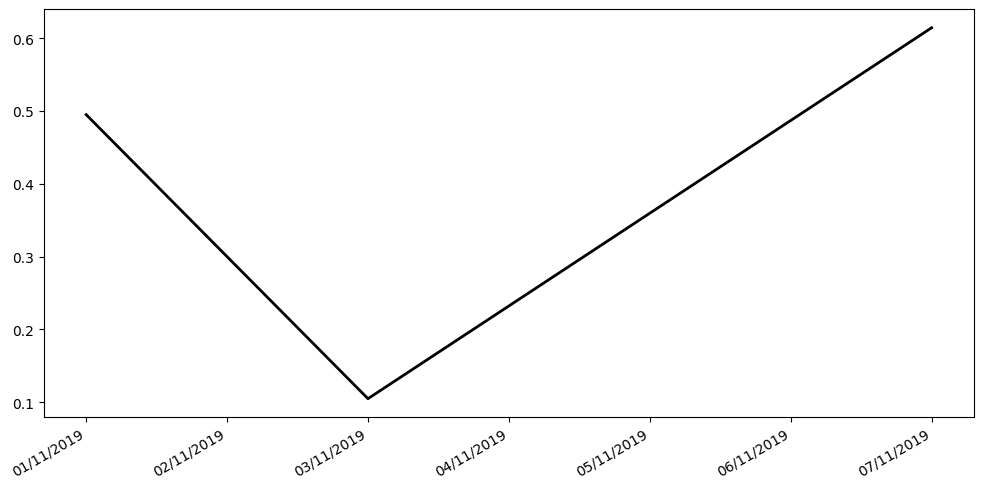

In [33]:
# EXEMPLO 7.2
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as pdt
import numpy as np

data = ['01/11/2019','03/11/2019','07/11/2019']
x = [dt.datetime.strptime(i,'%d/%m/%Y').date() for i in data]
y = np.random.normal(0,1,len(x))

plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(pdt.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(pdt.DayLocator())
plt.plot(x,y,'-k',linewidth=2)
plt.gcf().autofmt_xdate()
plt.show()

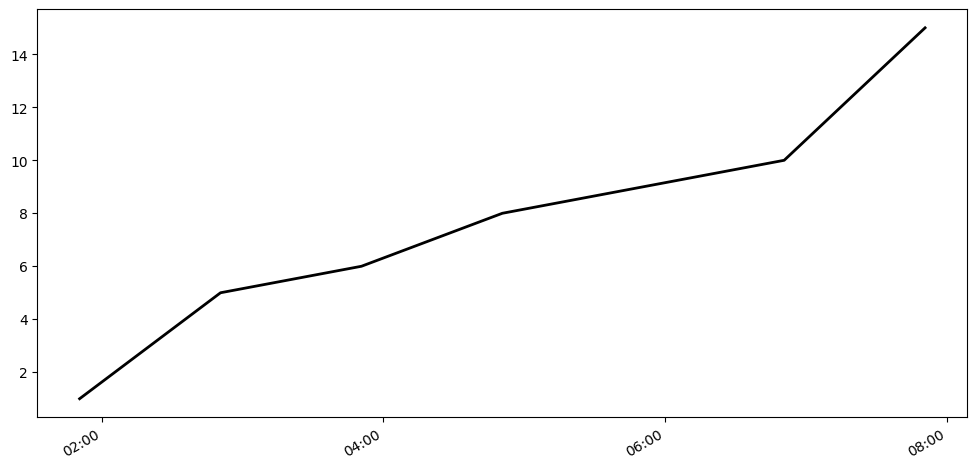

In [34]:
# EXEMPLO 7.3
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as pdt
import numpy as np

y=[1,5,6,8,9,10,15]
x=[dt.datetime.now()+dt.timedelta(hours=i) for i in range(len(y))]

plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(pdt.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(pdt.HourLocator(interval=2))
plt.plot(x,y,'-k',linewidth=2)
plt.gcf().autofmt_xdate()
plt.show()

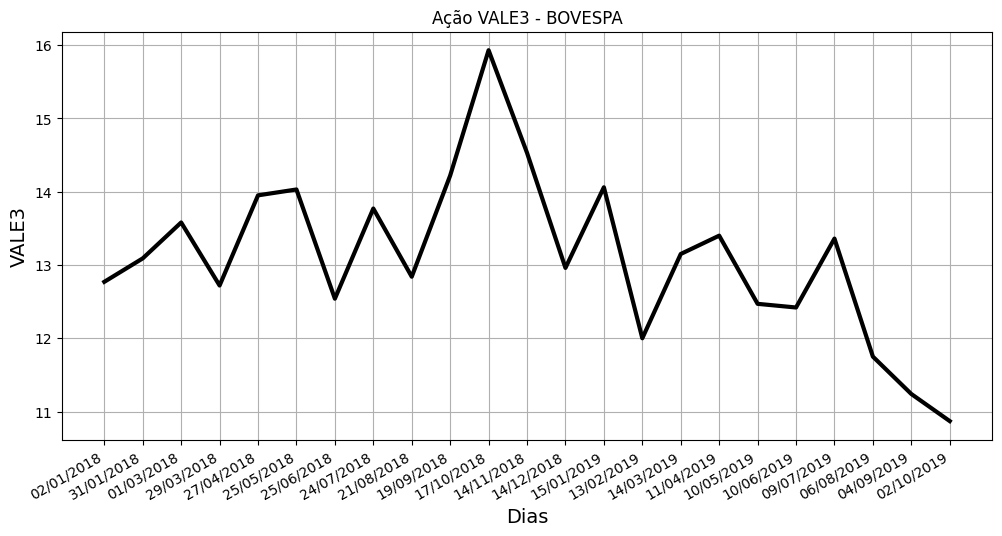

In [39]:
# EXEMPLO 7.4
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as pdt
import numpy as np
import xlrd as excel

wb = excel.open_workbook('dados/VALE_7.xls')
plan = wb.sheet_by_name("VALE")
lin = plan.nrows
col = plan.ncols

mat = np.zeros((lin,col))

for i in range(lin):
    for j in range(col):
        mat[i,j] = plan.cell(i,j).value

dataInt = mat[:,0].astype(int)
datas = [datetime.fromordinal(datetime(1900,1,1).toordinal() + 
                              dados_Ex -2).strftime("%d/%m/%Y") for dados_Ex in dataInt]

#print(datas)

plt.figure(figsize=(12,6))
aux1 = plt.subplot(111)
aux1.plot(datas[0:lin:20],mat[0:lin:20,1],'-k',linewidth=3)

plt.gcf().autofmt_xdate()
aux1.set_xlabel('Dias',fontsize=14)
aux1.set_ylabel('VALE3',fontsize=14)
aux1.set_title('Ação VALE3 - BOVESPA')
plt.grid()

['01/02/2019', '02/02/2019', '02/04/2019', '04/04/2019', '07/05/2019']
['3.5', '5.8', '3.78', '8.75', '5.1']


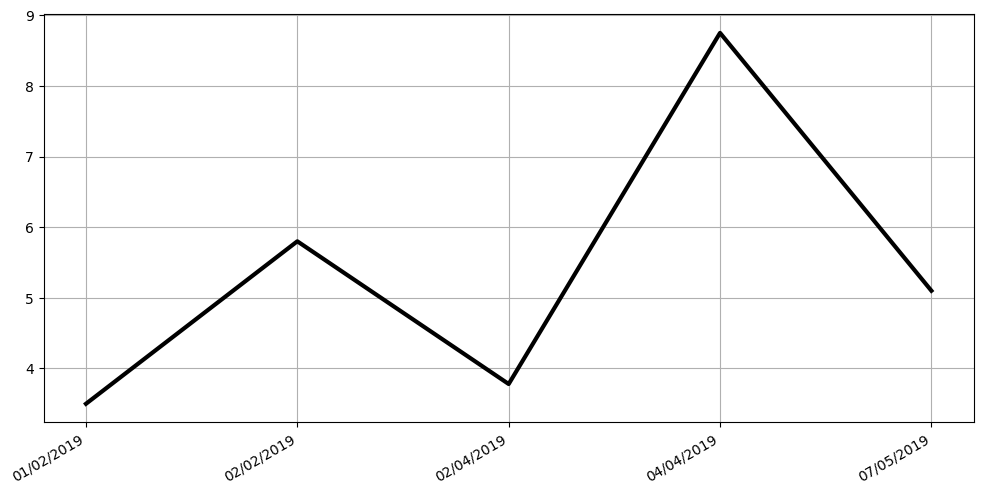

In [1]:
# EXEMPLO 7.6
import datetime as dt
import matplotlib.pyplot as plt

f = open("dados/datas.txt")
datas=[]
prec=[]

for linha in f:
    lista = linha.split("\n")
    x = lista[0][0:10]
    y = lista[0][12:len(lista[0])]
    datas.append(x)
    prec.append(y)

print(datas)
print(prec)

plt.figure(figsize=(12,6))
eixoY = [float(j) for j in prec]
plt.plot(datas,eixoY,'-k',linewidth=3)
plt.gcf().autofmt_xdate()
plt.grid()